<a href="https://colab.research.google.com/github/venkatasaikrishnadussa/azure-ai-explorer/blob/main/AI_102_Analyze_Images_with_Azure_AI_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

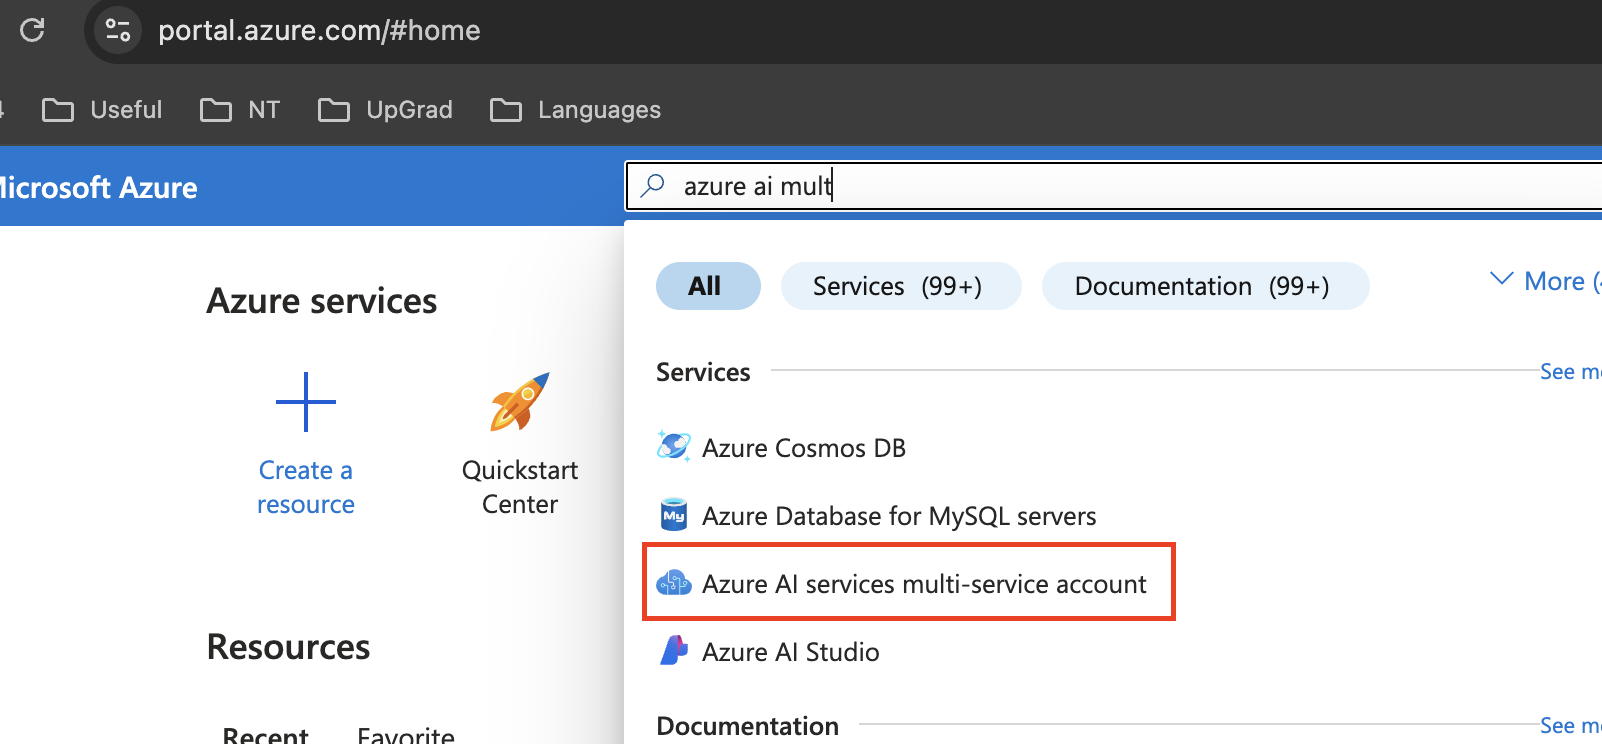

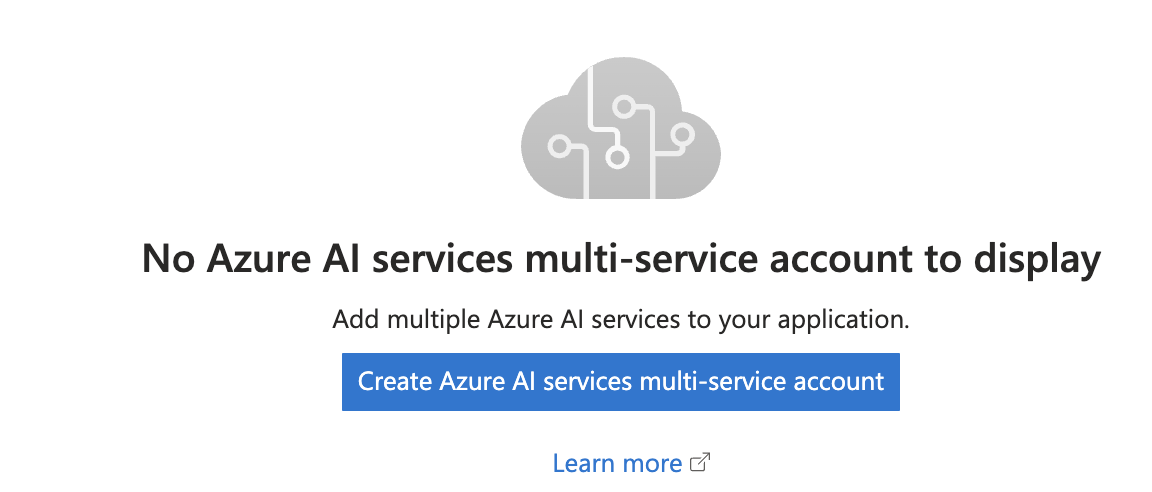

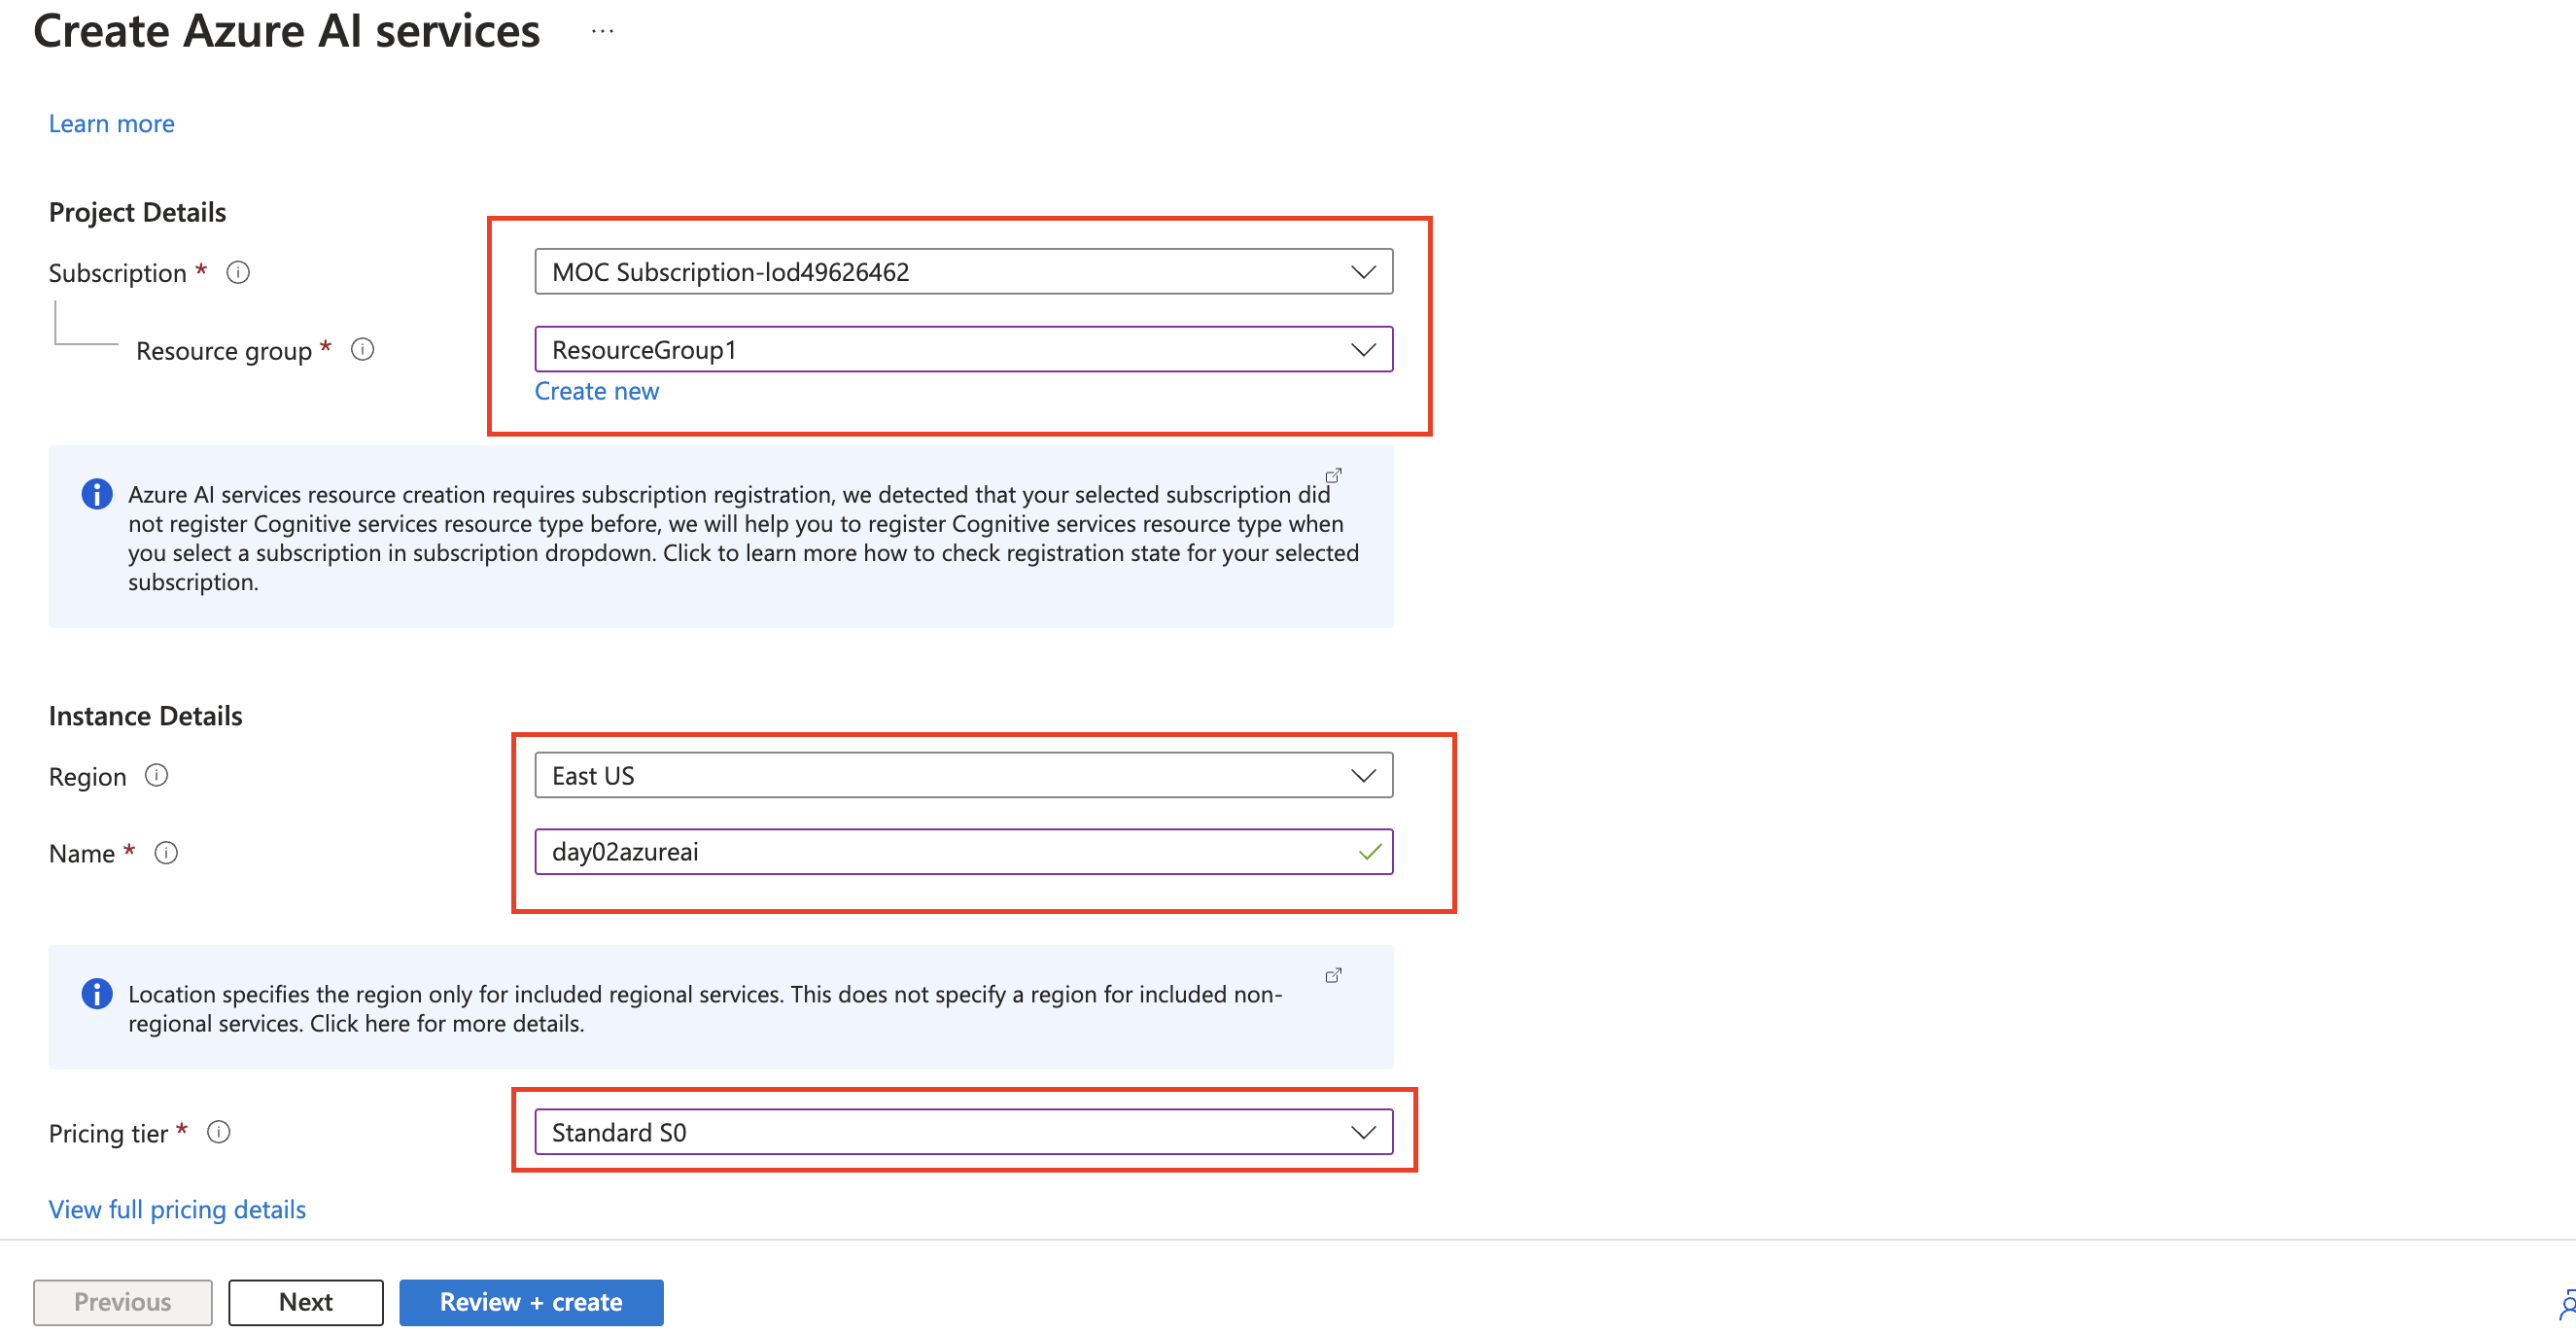

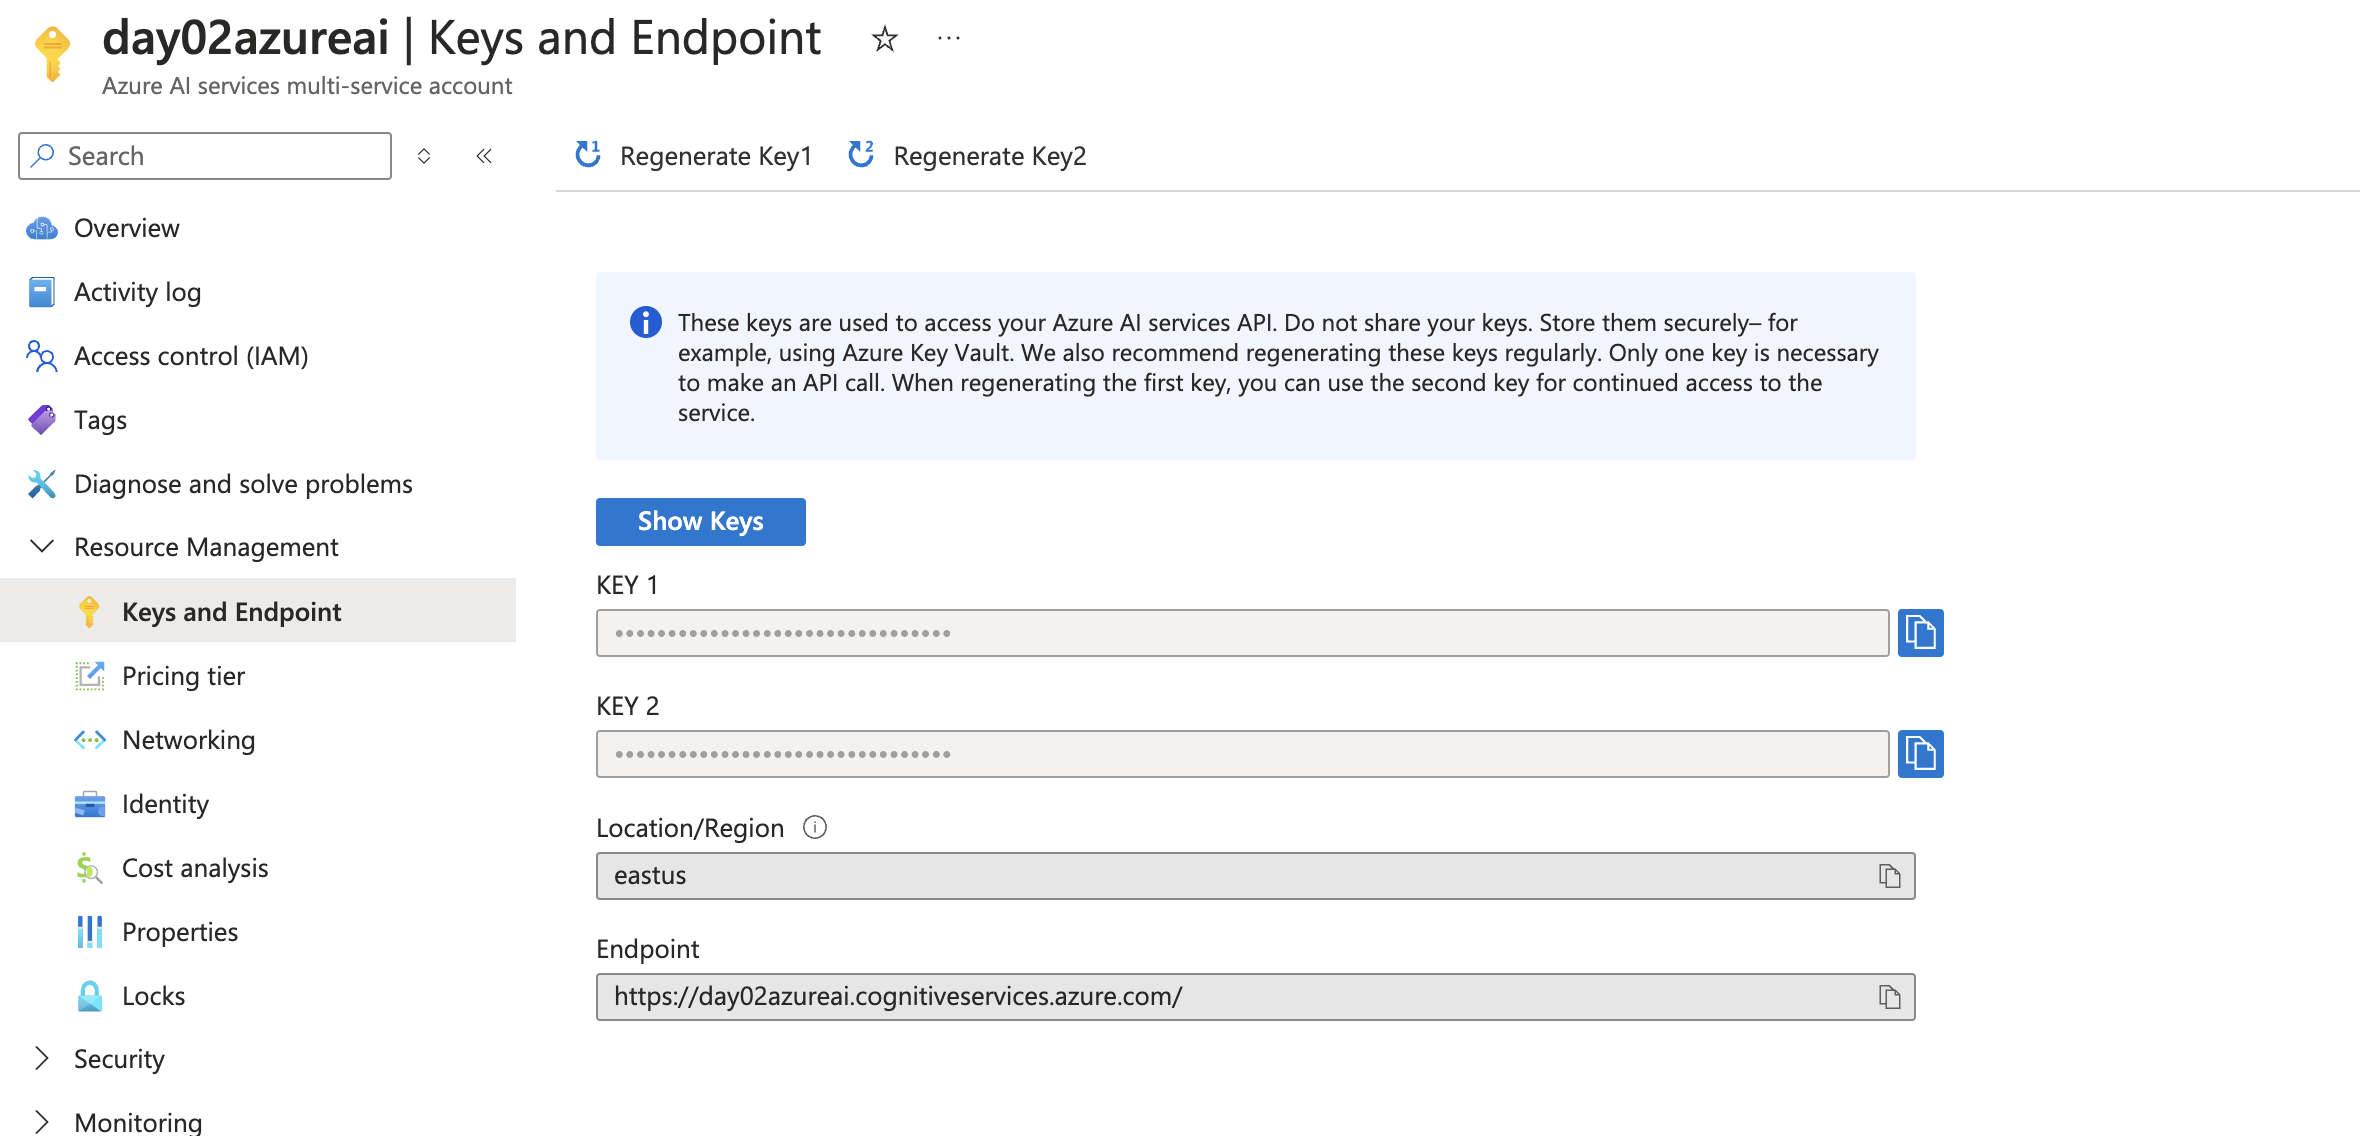

In [1]:
URL_ENDPOINT = "https://day02azureai.cognitiveservices.azure.com/"

from google.colab import userdata
API_KEY = userdata.get('AZURE_SUBSCRIPTION_KEY')

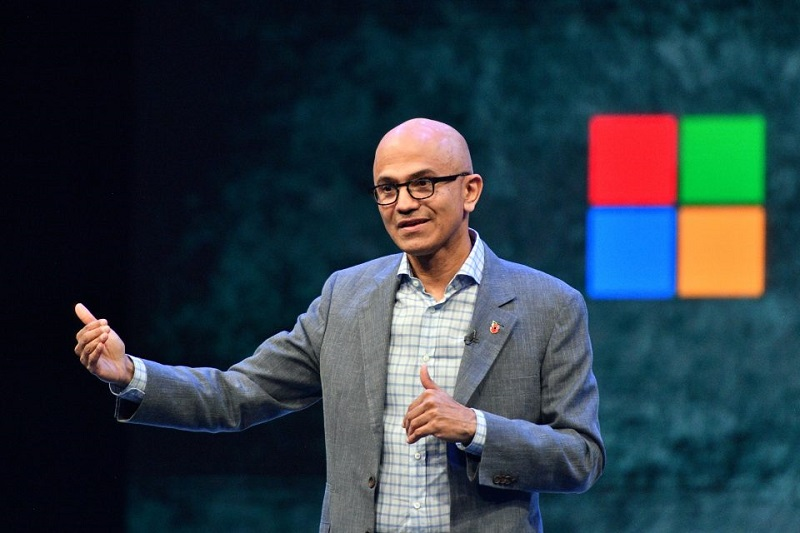

In [2]:
from PIL import Image

Image.open("/content/drive/MyDrive/ColabNotebooks/azure-ai-explorer/images/person.jpg")

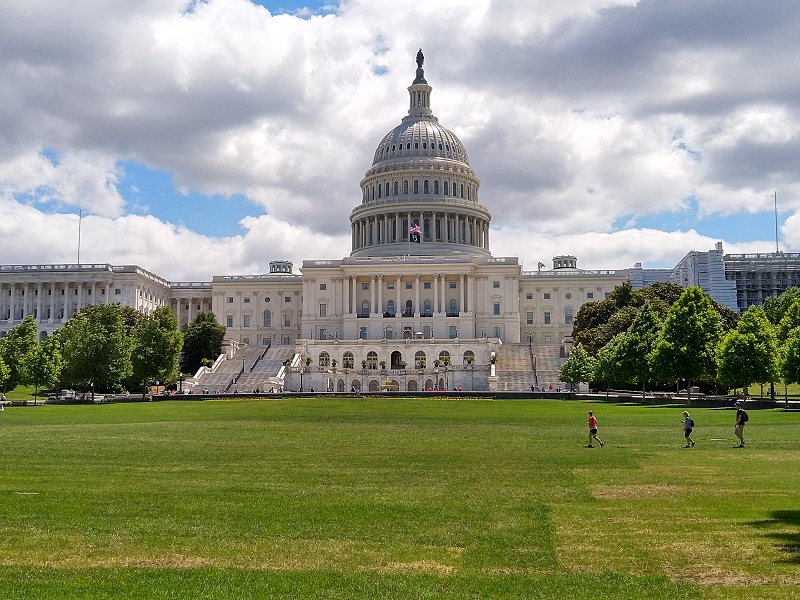

In [3]:
Image.open("/content/drive/MyDrive/ColabNotebooks/azure-ai-explorer/images/building.jpg")

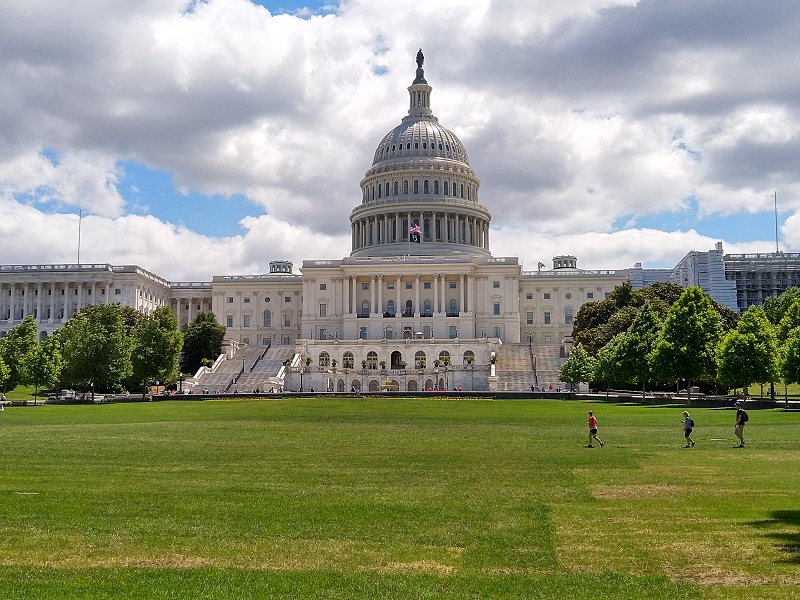

In [4]:
Image.open("/content/drive/MyDrive/ColabNotebooks/azure-ai-explorer/images/building.jpg")


In [5]:
!pip install azure-ai-vision-imageanalysis==1.0.0b3

In [6]:
from azure.ai.vision.imageanalysis import ImageAnalysisClient
from azure.ai.vision.imageanalysis.models import VisualFeatures
from azure.core.credentials import AzureKeyCredential

In [7]:
credential = AzureKeyCredential(API_KEY)
cv_client = ImageAnalysisClient(
    endpoint=URL_ENDPOINT,
    credential=credential
)

In [8]:
path = "/content/drive/MyDrive/ColabNotebooks/azure-ai-explorer/images/"
with open(path+"person.jpg", "rb") as f:
  image_data = f.read()

In [9]:
caption_result = cv_client.analyze(image_data, visual_features=[VisualFeatures.CAPTION])
print(caption_result.caption)

{'text': 'a man in a suit', 'confidence': 0.785515308380127}


In [10]:
print(f"Image caption: {caption_result.caption.text}, confidence score: {caption_result.caption.confidence}")

Image caption: a man in a suit, confidence score: 0.785515308380127


In [11]:
dense_captions_result = cv_client.analyze(image_data, visual_features=[VisualFeatures.DENSE_CAPTIONS])
print(dense_captions_result.dense_captions)

{'values': [{'text': 'a man in a suit', 'confidence': 0.785515308380127, 'boundingBox': {'x': 0, 'y': 0, 'w': 800, 'h': 533}}, {'text': 'a man in a suit giving a thumbs up', 'confidence': 0.8095719814300537, 'boundingBox': {'x': 60, 'y': 108, 'w': 537, 'h': 413}}]}


In [12]:
for caption in dense_captions_result.dense_captions.list:
  print(f"Caption: {caption.text}, confidence score: {caption.confidence}")

Caption: a man in a suit, confidence score: 0.785515308380127
Caption: a man in a suit giving a thumbs up, confidence score: 0.8095719814300537


In [13]:
tags_result = cv_client.analyze(image_data, visual_features=[VisualFeatures.TAGS])
print(tags_result.tags)

{'values': [{'name': 'clothing', 'confidence': 0.9972387552261353}, {'name': 'person', 'confidence': 0.9933468103408813}, {'name': 'human face', 'confidence': 0.9889143705368042}, {'name': 'man', 'confidence': 0.9457529783248901}, {'name': 'orator', 'confidence': 0.904175877571106}, {'name': 'glasses', 'confidence': 0.8957211375236511}, {'name': 'speech', 'confidence': 0.8932870626449585}, {'name': 'spokesperson', 'confidence': 0.8881994485855103}, {'name': 'public speaking', 'confidence': 0.8586186170578003}, {'name': 'shirt', 'confidence': 0.8520839214324951}, {'name': 'gentleman', 'confidence': 0.8501646518707275}, {'name': 'suit', 'confidence': 0.8460374474525452}, {'name': 'healthcare', 'confidence': 0.4177837073802948}]}


In [14]:
for tag in tags_result.tags.list:
  print(f"Caption: {tag.name}, confidence score: {tag.confidence}")

Caption: clothing, confidence score: 0.9972387552261353
Caption: person, confidence score: 0.9933468103408813
Caption: human face, confidence score: 0.9889143705368042
Caption: man, confidence score: 0.9457529783248901
Caption: orator, confidence score: 0.904175877571106
Caption: glasses, confidence score: 0.8957211375236511
Caption: speech, confidence score: 0.8932870626449585
Caption: spokesperson, confidence score: 0.8881994485855103
Caption: public speaking, confidence score: 0.8586186170578003
Caption: shirt, confidence score: 0.8520839214324951
Caption: gentleman, confidence score: 0.8501646518707275
Caption: suit, confidence score: 0.8460374474525452
Caption: healthcare, confidence score: 0.4177837073802948


In [15]:
def analyze_image(image_path):
  with open(image_path, "rb") as f:
    image_data = f.read()
  result = cv_client.analyze(image_data,
                                     visual_features=[
                                         VisualFeatures.CAPTION,
                                         VisualFeatures.DENSE_CAPTIONS,
                                         VisualFeatures.TAGS
                                         ]
                                     )
  print("Image Caption:")
  print(f"Image caption: {result.caption.text}, confidence score: {round(result.caption.confidence, 2)}")
  print("*" * 30)

  print("Dense Image Captions:")
  for caption in result.dense_captions.list:
    print(f"Caption: {caption.text}, confidence score: {round(caption.confidence, 2)}")
  print("*" * 30)

  print("Detected Tags:")
  for tag in result.tags.list:
    print(f"Caption: {tag.name}, confidence score: {round(tag.confidence, 2)}")

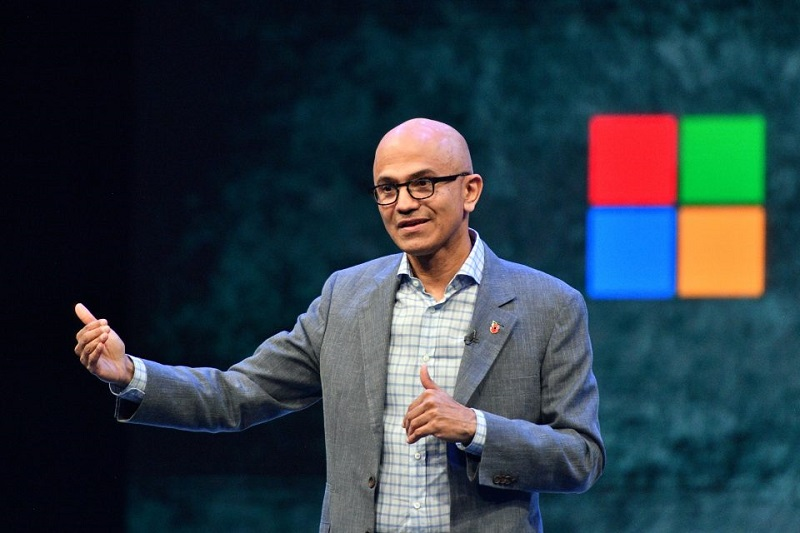

In [16]:
image_path = path + "person.jpg"
Image.open(image_path)

In [17]:
analyze_image(image_path)

Image Caption:
Image caption: a man in a suit, confidence score: 0.79
******************************
Dense Image Captions:
Caption: a man in a suit, confidence score: 0.79
Caption: a man in a suit giving a thumbs up, confidence score: 0.81
******************************
Detected Tags:
Caption: clothing, confidence score: 1.0
Caption: person, confidence score: 0.99
Caption: human face, confidence score: 0.99
Caption: man, confidence score: 0.95
Caption: orator, confidence score: 0.9
Caption: glasses, confidence score: 0.9
Caption: speech, confidence score: 0.89
Caption: spokesperson, confidence score: 0.89
Caption: public speaking, confidence score: 0.86
Caption: shirt, confidence score: 0.85
Caption: gentleman, confidence score: 0.85
Caption: suit, confidence score: 0.85
Caption: healthcare, confidence score: 0.42


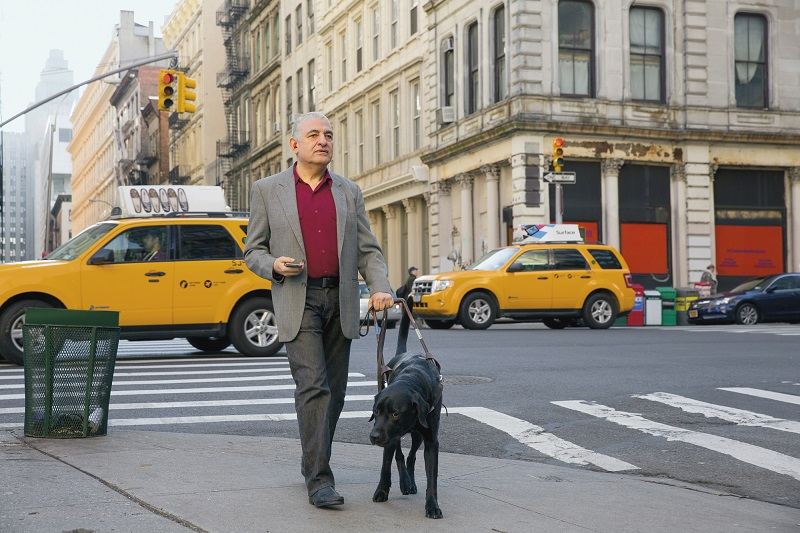

In [18]:
image_path = path + "street.jpg"
Image.open(image_path)

In [19]:
analyze_image(image_path)

Image Caption:
Image caption: a man walking a dog on a leash on a street, confidence score: 0.82
******************************
Dense Image Captions:
Caption: a man walking a dog on a leash on a street, confidence score: 0.82
Caption: a man walking on a street, confidence score: 0.69
Caption: a yellow car on the street, confidence score: 0.78
Caption: a black dog walking on the street, confidence score: 0.75
Caption: a blurry image of a blue car, confidence score: 0.82
Caption: a yellow taxi cab on the street, confidence score: 0.72
******************************
Detected Tags:
Caption: outdoor, confidence score: 1.0
Caption: land vehicle, confidence score: 0.99
Caption: vehicle, confidence score: 0.99
Caption: building, confidence score: 0.99
Caption: road, confidence score: 0.96
Caption: wheel, confidence score: 0.95
Caption: street, confidence score: 0.95
Caption: person, confidence score: 0.93
Caption: clothing, confidence score: 0.91
Caption: taxi, confidence score: 0.91
Caption: 

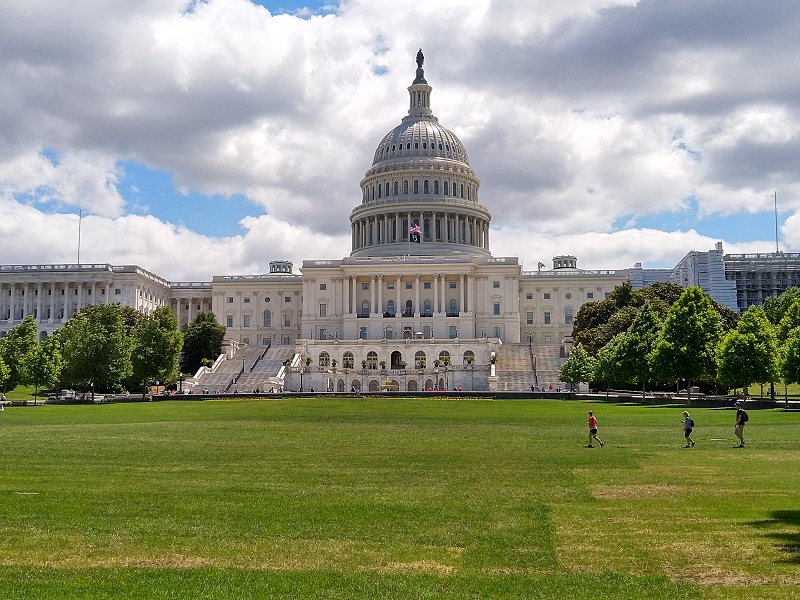

In [20]:
image_path = path + "building.jpg"
Image.open(image_path)

In [21]:
analyze_image(image_path)

Image Caption:
Image caption: a large white building with a dome and a large lawn with United States Capitol in the background, confidence score: 0.65
******************************
Dense Image Captions:
Caption: a large white building with a dome and a large lawn, confidence score: 0.65
******************************
Detected Tags:
Caption: outdoor, confidence score: 1.0
Caption: cloud, confidence score: 1.0
Caption: grass, confidence score: 1.0
Caption: tree, confidence score: 0.99
Caption: sky, confidence score: 0.99
Caption: building, confidence score: 0.96
Caption: dome, confidence score: 0.91
Caption: presidential palace, confidence score: 0.91
Caption: landmark, confidence score: 0.9
Caption: palace, confidence score: 0.9
Caption: plant, confidence score: 0.89
Caption: courthouse, confidence score: 0.85
Caption: field, confidence score: 0.83
Caption: city, confidence score: 0.76
Caption: large, confidence score: 0.69
Caption: park, confidence score: 0.54
